In [1]:
from src.MissionControl import MissionControl
from src.Functions import RK4
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# DN3: Obhod Lune
Z uporabo sistema navadnih diferencialnih enačb bomo simulirali obhod sonde okoli Lune, in njene vrnitve nazaj na Zemljo. Za testiranje rešitve uporabimo knjižnico scipy.Vsa dokumentacija se nahaja v datotekah v mapi src/

In [2]:
#Definiramo nekaj scenarijev
greedy_crash_scenario = [MissionControl.POSITION_STABLE_ORBIT, 2.72, 0, 7.58, 0, 0]
flyby_miss_scenario = [MissionControl.POSITION_STABLE_ORBIT, 0, 0, 8.055, 0, 0]
flyby_return_scenario = [MissionControl.POSITION_STABLE_ORBIT, 1, 0, 8.0055, 0, 0]
initial_conditions = [MissionControl.POSITION_STABLE_ORBIT, 5.6, 0, 4, 0, 0]
good_enough_conditions = [MissionControl.POSITION_STABLE_ORBIT, 6.970 , 0, 4, 0, 0]

Začetne vrednosti so bile najdene z veliko igranja in 'metodo ostrega očesa'. V bistvu smo na roke izvajali bisekcijo.

In [3]:
#Please ignore this code of block, it isn't pretty
t_start, t_end = (0,4.1)
num_points = 5000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)
solution_1 = RK4(MissionControl.ApolloMissionSimulationStep,greedy_crash_scenario,h, t_values)
t_start, t_end = (0,5)
num_points = 5000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)
solution_2 = RK4(MissionControl.ApolloMissionSimulationStep,flyby_miss_scenario,h, t_values)
t_start, t_end = (0,5.5)
num_points = 5000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)
solution_3 = RK4(MissionControl.ApolloMissionSimulationStep,flyby_return_scenario,h, t_values)
t_start, t_end = (0,1)
num_points = 5000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)
solution_4 = RK4(MissionControl.ApolloMissionSimulationStep,initial_conditions,h, t_values)
t_start, t_end = (0,2)
num_points = 5000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)
solution_5 = RK4(MissionControl.ApolloMissionSimulationStep,good_enough_conditions,h, t_values)

## Flyby 1 scenarij

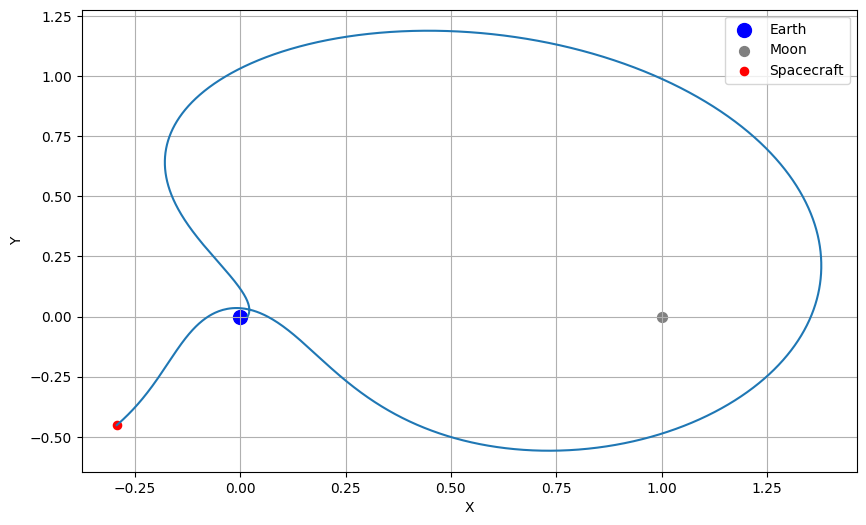

In [4]:
result = solution_1
plt.figure(figsize=(10, 6))
plt.plot(result[:,0],  result[:,2])
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(result[:,0][-1], result[:,2][-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

## Flyby 2 scenarij

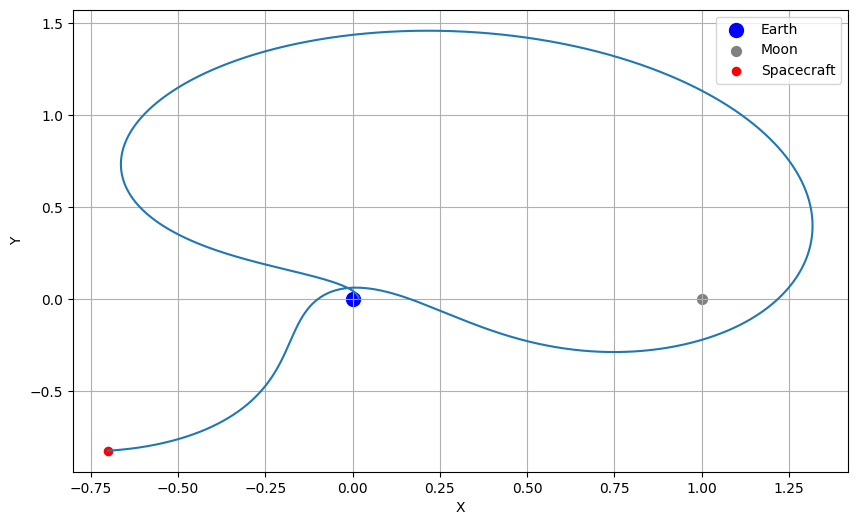

In [5]:
# Prikažemo rezultate
result = solution_2
plt.figure(figsize=(10, 6))
plt.plot(result[:,0],  result[:,2])
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(result[:,0][-1], result[:,2][-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

## 'Uspešna' misija

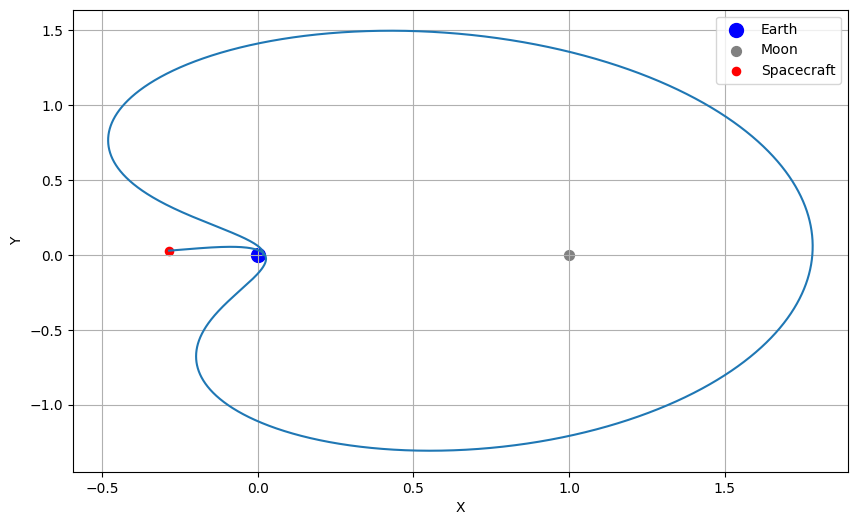

In [6]:
# Prikažemo rezultate
result = solution_3
plt.figure(figsize=(10, 6))
plt.plot(result[:,0],  result[:,2])
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(result[:,0][-1], result[:,2][-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

## Spinning is a good trick

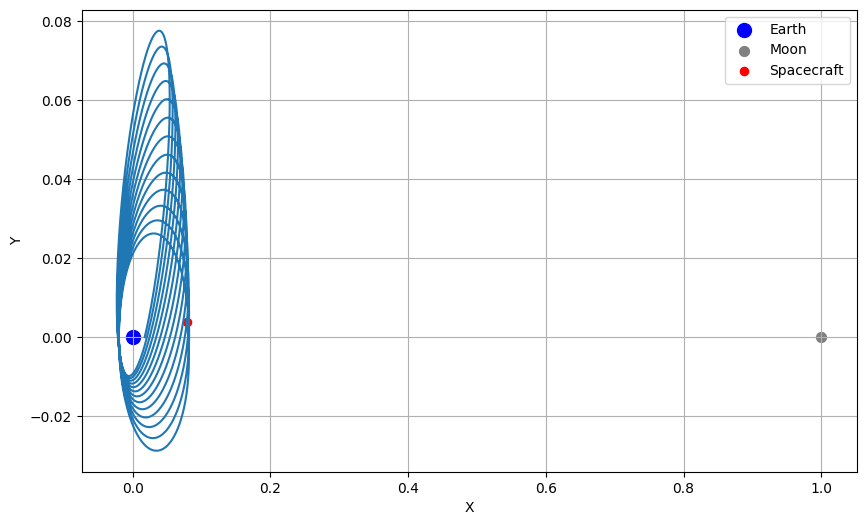

In [7]:
# Prikažemo rezultate
result = solution_4
plt.figure(figsize=(10, 6))
plt.plot(result[:,0],  result[:,2])
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(result[:,0][-1], result[:,2][-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

## Uspešna izstrelitev
Spodnji primer definiramo kot 'uspešno misijo'

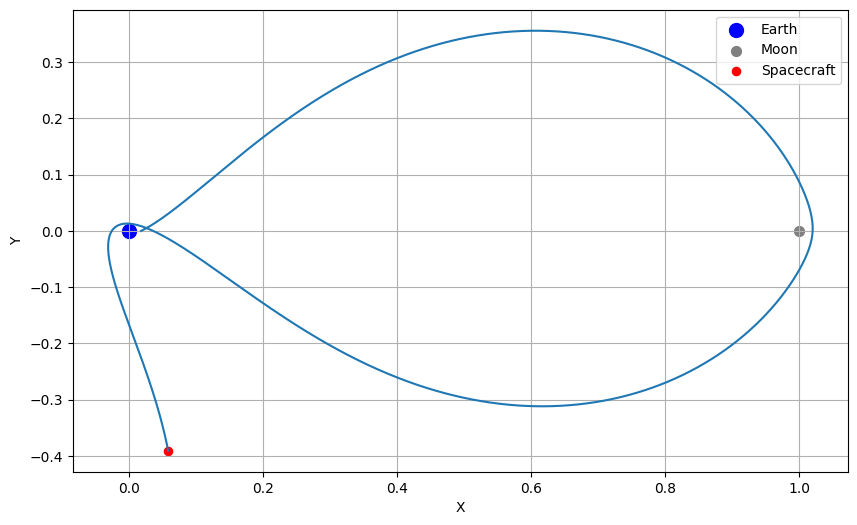

In [8]:
# Prikažemo rezultate
result = solution_5
plt.figure(figsize=(10, 6))
plt.plot(result[:,0],  result[:,2])
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(result[:,0][-1], result[:,2][-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

datoteka success.gif tudi predstavlja animacijo uspešne misije
![Uspešna Misija](success.gif)